Error Correction (Perceptron Learning)

In [1]:
import numpy as np

In [22]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])
w = np.zeros(2)
b = 0
lr = 0.1
epochs = 100
def f(x):
  return 1 if x>=0.5 else 0

for _ in range(epochs):
  for x,y in zip(X,Y):
    y_pred = np.dot(x,w) * b
    error = y-y_pred
    w += lr * error * x
    b += lr * error
print("Weights:", w)
print("Bias",b)
print("Output:\n")

for x in X:
  print(x,"->",f(np.dot(x,w)*b))

Weights: [3.11810803 2.79318588]
Bias 0.1269435860514553
Output:

[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


Hebbian Learning

<function matplotlib.pyplot.show(close=None, block=None)>

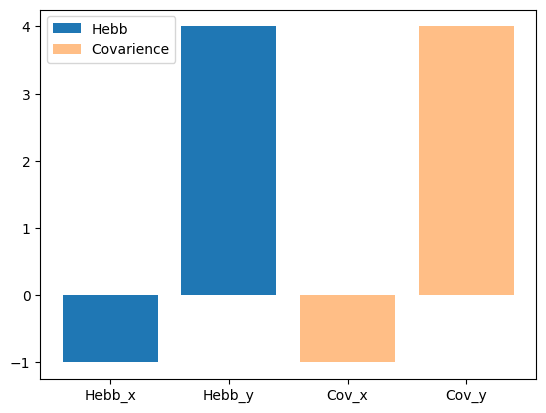

In [13]:
X = np.array([[2,1],[1,-1],[-2,2]])
Y = np.array([1,-1,1])

# Hebbian
w_hebb = sum(x*y for x,y in zip(X,Y))

#covarience
Xc = X - np.mean(X,0)
Yc = Y - np.mean(Y,0)
w_cov = sum(x*y for x,y in zip(X,Y))

#visualise
import matplotlib.pyplot as plt
plt.bar(['Hebb_x','Hebb_y'], w_hebb, label = 'Hebb')
plt.bar(['Cov_x','Cov_y'],w_cov, alpha = 0.5, label = 'Covarience')
plt.legend()
plt.show

Gate operations using Single Layer Perceptron

In [28]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_and = np.array([0,0,0,1])
Y_or = np.array([0,1,1,1])

w_and,w_or = np.zeros(2),np.zeros(2)
b_and, b_or = 0,0
epochs = 100
lr = 0.1

def f(x):
  return 1 if x>=0.5 else 0

#AND
for _ in range(epochs):
  for x,y in zip(X,Y_and):
    y_pred = np.dot(w_and,x) + b_and
    error = y - f(y_pred)
    w_and += error * lr * x
    b_and += error * lr

#OR
for _ in range(epochs):
  for x,y in zip(X,Y_or):
    y_pred = np.dot(w_or,x) + b_or
    error = y - f(y_pred)
    w_or += error * lr * x
    b_or += error * lr

print("AND Gate")
for x in X:
  print(x,"->",f(np.dot(w_and,x)+b_and))

print("\n OR Gate")
for x in X:
  print(x,"->",f(np.dot(w_or,x)+b_or))

AND Gate
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1

 OR Gate
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


XOR with MLP

In [30]:
import torch, torch.nn as nn

X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
Y = torch.tensor([0.,1.,1.,0.])

class XOR(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(nn.Linear(2,2), nn.Sigmoid(), nn.Linear(2,1), nn.Sigmoid())
  def forward(self,x):
    return self.net(x)

print("XOR MLP outputs with different learning rates:")
for lr in [0.01,0.1,1]:
  model = XOR()
  opt = torch.optim.SGD(model.parameters(),lr=lr)
  for _ in range(10000):
    loss = nn.MSELoss()(model(X),Y)
    opt.zero_grad()
    loss.backward()
    opt.step()
  print(f"LR={lr}:", model(X).detach().round().squeeze().numpy())

XOR MLP outputs with different learning rates:


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


LR=0.01: [1. 0. 1. 0.]
LR=0.1: [0. 0. 1. 1.]
LR=1: [1. 0. 0. 1.]


Hebbian PCA

In [31]:
import numpy as np

X = np.random.randn(100,2)
w = np.random.rand(2)
w /= np.linalg.norm(w)
lr = 0.01

for x in X:
  y = np.dot(w,x)
  w += lr * y * (x - y*w)

w /= np.linalg.norm(w)
print("Principle Component (normalised):",w)

Principle Component (normalised): [0.81964067 0.57287798]


Self Organising Map

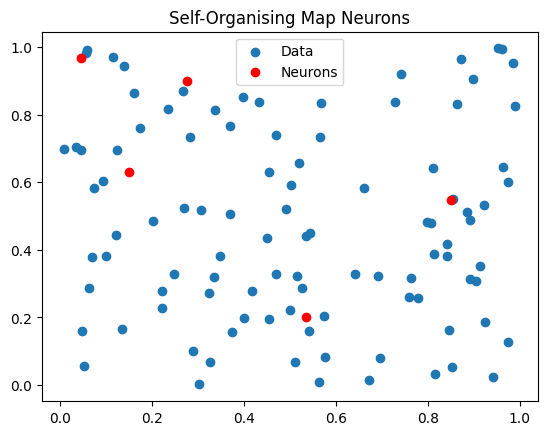

In [34]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100,2)
W = np.random.rand(5,2)
lr = 0.1

for x in X:
  i = np.argmin(np.linalg.norm(W-x, axis=1))
  W[i] += lr * (x-W[i])

plt.scatter(X[:,0], X[:,1], label = 'Data')
plt.scatter(W[:,0], W[:,1], c='red', label = 'Neurons')
plt.title("Self-Organising Map Neurons")
plt.legend()
plt.show()

Recurrent Neural Network with Time

In [36]:
import torch, torch.nn as nn

rnn = nn.RNN(input_size=1, hidden_size=5, batch_first=True)
x = torch.randn(1,10,1)
h0 = torch.zeros(1,1,5)

out, hn = rnn(x,h0)
print("RNN Output at each time step:\n",out.squeeze().detach().numpy())

RNN Output at each time step:
 [[ 0.02679928  0.002402    0.1638732  -0.263225    0.18284869]
 [-0.02095381 -0.05832943  0.26592997 -0.21234292  0.05838037]
 [ 0.18181682  0.21959774  0.37424278  0.08680563  0.1417539 ]
 [ 0.3359635   0.5036382   0.48245728  0.09775998  0.04000348]
 [ 0.21809387  0.5394025   0.43078256 -0.01616778 -0.06436594]
 [ 0.12518102  0.46489623  0.319936   -0.04864011 -0.04713986]
 [ 0.2964444   0.56299037  0.40220073  0.14036675  0.02025351]
 [ 0.654695    0.8548197   0.6790423   0.52578443  0.02608685]
 [ 0.39116177  0.7895647   0.55175424  0.01829296 -0.1627301 ]
 [ 0.14099908  0.61591744  0.3667543  -0.00222769 -0.1210123 ]]


Hopfield Network with Associative Memory

In [37]:
import numpy as np

X = np.array([1,-1,1,-1])
W = X.T @ X
np.fill_diagonal(W,0)

test = np.array([1,1,-1,-1])
output = np.sign(W @ test)

print("Hopfield:", output)

ValueError: array must be at least 2-d

Neural Network on Iris Dataset

In [38]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

X, y = load_iris(return_X_y = True)
clf = MLPClassifier(hidden_layer_sizes = (5,), max_iter=500)
clf.fit(X,y)

print("Training Accuracy", clf.score(X,y))

Training Accuracy 0.6733333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Optimizers: AdaGrad, RMSProp and Adam

In [41]:
import torch, torch.nn as nn
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y)

for opt_name in ['Adam','RMSprop','Adagrad']:
  model = nn.Linear(4,3)
  opt = getattr(torch.optim, opt_name)(model.parameters(), lr=0.01)
  for _ in range(100):
    pred = model(X)
    loss = nn.CrossEntropyLoss()(pred,y)
    opt.zero_grad()
    loss.backward()
    opt.step()
  print(f'{opt_name} Final Loss:',loss.item())

Adam Final Loss: 0.5654903650283813
RMSprop Final Loss: 0.4027427136898041
Adagrad Final Loss: 0.9814457297325134


LSTM Cell Forward Pass

In [44]:
import torch

x = torch.randn(1,3)
h = torch.randn(1,5)
c = torch.randn(1,5)
concat = torch.cat((x,h),dim=1)

Wf = torch.randn(8,5)
Wi = torch.randn(8,5)
Wc = torch.randn(8,5)
Wo = torch.randn(8,5)

f = torch.sigmoid(concat @ Wf)
i = torch.sigmoid(concat @ Wi)
c_ = torch.sigmoid(concat @ Wc)
o = torch.sigmoid(concat @ Wo)

c = f * i * c_ * o
h = o * torch.tanh(c)

print("LSTM Hidden State Output:",h)

LSTM Hidden State Output: tensor([[0.0006, 0.0009, 0.0053, 0.0039, 0.3194]])
